In [15]:
# IMPORTAR LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')
# Configuració estètica
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")


# Si el archivo usa otro separador como punto y coma
df = pd.read_csv(
    r"C:\Users\Lucan Vieira\Downloads\paro-dataset.csv",
    sep=';',  # o el delimitador que corresponda
    engine='python'
)

# Mostrar las primeras filas para verificar
print(df.head())

print("Tipos de datos por columna:")
print(df.dtypes)

# Información detallada
print("\nInformación completa del dataset:")
print(df.info())

# Estadísticas descriptivas por tipo de dato
print("\nResumen de datos numéricos:")
print(df.describe())

paro = df.copy()


✅ Librerías importadas correctamente
          Sexo Comunidades y Ciudades Autónomas   Edad Periodo  Total
0  Ambos sexos                   Total Nacional  Total  2025T2  10,29
1  Ambos sexos                   Total Nacional  Total  2025T1  11,36
2  Ambos sexos                   Total Nacional  Total  2024T4  10,61
3  Ambos sexos                   Total Nacional  Total  2024T3  11,21
4  Ambos sexos                   Total Nacional  Total  2024T2  11,27
Tipos de datos por columna:
Sexo                                object
Comunidades y Ciudades Autónomas    object
Edad                                object
Periodo                             object
Total                               object
dtype: object

Información completa del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39480 entries, 0 to 39479
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sexo          

# LIMPIEZA


In [18]:
# 1. Primero veamos qué valores únicos hay en la columna Total
print("🔍 Valores únicos en la columna 'Total':")
valores_unicos = df['Total'].value_counts().head(20)
print(valores_unicos)

# 2. Contar cuántos valores '..' hay
valores_problematicos = df[df['Total'] == '..']
print(f"\n⚠️  Número de valores '..' (problemáticos): {len(valores_problematicos)}")

# 3. Ver algunos ejemplos de estos registros problemáticos
if len(valores_problematicos) > 0:
    print("\n📋 Ejemplos de registros con valores '..':")
    print(valores_problematicos.head()[['Sexo', 'Comunidades y Ciudades Autónomas', 'Edad', 'Periodo', 'Total']])

🔍 Valores únicos en la columna 'Total':
Total
100      245
..       150
0         95
9,41      30
10,02     27
9,6       26
9,71      25
10,97     24
8,68      24
8,76      24
10,32     24
13,83     24
11,89     24
10,04     24
8,25      23
13,27     23
8,62      23
10,14     23
9,4       22
10,39     22
Name: count, dtype: int64

⚠️  Número de valores '..' (problemáticos): 150

📋 Ejemplos de registros con valores '..':
              Sexo Comunidades y Ciudades Autónomas             Edad Periodo  \
12157  Ambos sexos                         18 Ceuta  De 16 a 19 años  2017T3   
12164  Ambos sexos                         18 Ceuta  De 16 a 19 años  2015T4   
12794  Ambos sexos                       19 Melilla  De 16 a 19 años  2022T4   
12799  Ambos sexos                       19 Melilla  De 16 a 19 años  2021T3   
12828  Ambos sexos                       19 Melilla  De 16 a 19 años  2014T2   

      Total  
12157    ..  
12164    ..  
12794    ..  
12799    ..  
12828    ..  


In [19]:
# Análisis más detallado de los valores problemáticos
def analizar_valores_problematicos(df):
    # Identificar todos los valores no convertibles
    valores_originales = df['Total'].copy()
    
    # Intentar conversión y marcar errores
    def intentar_convertir(valor):
        try:
            if valor == '..':
                return np.nan
            return float(str(valor).replace(',', '.'))
        except:
            return f"ERROR: {valor}"
    
    resultados = valores_originales.apply(intentar_convertir)
    problemas = resultados[resultados.apply(lambda x: isinstance(x, str) and x.startswith('ERROR'))]
    
    if len(problemas) > 0:
        print(f"🚨 Valores problemáticos encontrados:")
        for valor_problematico in problemas.unique():
            print(f"   - {valor_problematico}")
            count = (resultados == valor_problematico).sum()
            print(f"     Cantidad: {count}")
    else:
        print("✅ No hay valores problemáticos adicionales")

analizar_valores_problematicos(df)

✅ No hay valores problemáticos adicionales


In [20]:
# Solución: Reemplazar '..' por NaN y luego convertir a numérico
import numpy as np

# 1. Reemplazar valores problemáticos por NaN
df['Total'] = df['Total'].replace('..', np.nan)

# 2. También verificar si hay otros valores no numéricos
print("🔍 Valores únicos después de reemplazar '..':")
print(df['Total'].unique()[:20])  # Mostrar primeros 20 valores únicos

# 3. Convertir a numérico (manejando errores)
df['Total'] = pd.to_numeric(df['Total'].str.replace(',', '.'), errors='coerce')

# 4. Verificar la conversión
print(f"\n✅ Columna 'Total' convertida a numérica")
print(f"Tipo de dato de Total: {df['Total'].dtype}")
print(f"Valores nulos después de la conversión: {df['Total'].isnull().sum()}")
print(f"Porcentaje de valores nulos: {df['Total'].isnull().sum() / len(df) * 100:.2f}%")

# 5. Estadísticas de la columna convertida
print("\n📊 Estadísticas de la tasa de desempleo (valores válidos):")
print(df['Total'].describe())

🔍 Valores únicos después de reemplazar '..':
['10,29' '11,36' '10,61' '11,21' '11,27' '12,29' '11,8' '11,89' '11,67'
 '13,38' '12,99' '12,73' '12,69' '13,73' '13,44' '14,71' '15,39' '16,14'
 '16,13' '16,26']

✅ Columna 'Total' convertida a numérica
Tipo de dato de Total: float64
Valores nulos después de la conversión: 150
Porcentaje de valores nulos: 0.38%

📊 Estadísticas de la tasa de desempleo (valores válidos):
count    39330.000000
mean        24.654217
std         18.585995
min          0.000000
25%         11.010000
50%         18.850000
75%         32.760000
max        100.000000
Name: Total, dtype: float64



ANÁLISIS EXPLORATORIO COMPLETO
📊 Dataset shape: (39480, 5)
📅 Periodos únicos: 94
🏛️ Comunidades autónomas: 20
👥 Grupos de sexo: ['Ambos sexos', 'Hombres', 'Mujeres']
👶 Grupos de edad: ['Total', 'Menores de 25 años', '25 y más años', 'De 16 a 19 años', 'De 20 a 24 años', 'De 25 a 54 años', 'De 55 y más años']

📈 Tendencias nacionales disponibles: 94 períodos


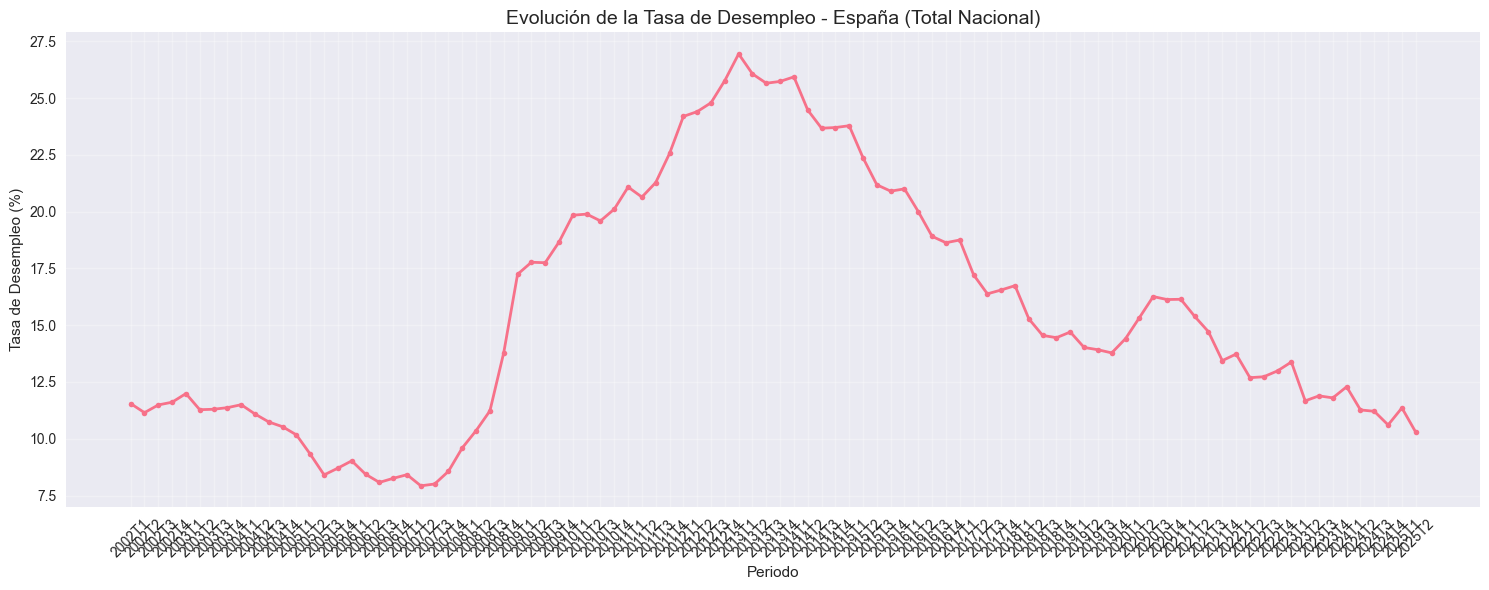

In [21]:
# Continuar con el análisis una vez solucionado el problema
print("\n" + "="*50)
print("ANÁLISIS EXPLORATORIO COMPLETO")
print("="*50)

# 1. Información básica del dataset limpio
print(f"📊 Dataset shape: {df.shape}")
print(f"📅 Periodos únicos: {df['Periodo'].nunique()}")
print(f"🏛️ Comunidades autónomas: {df['Comunidades y Ciudades Autónomas'].nunique()}")
print(f"👥 Grupos de sexo: {df['Sexo'].unique().tolist()}")
print(f"👶 Grupos de edad: {df['Edad'].unique().tolist()}")

# 2. Evolución temporal del desempleo (datos limpios)
df_nacional = df[
    (df['Comunidades y Ciudades Autónomas'] == 'Total Nacional') & 
    (df['Sexo'] == 'Ambos sexos') & 
    (df['Edad'] == 'Total') &
    (df['Total'].notna())
].sort_values('Periodo')

print(f"\n📈 Tendencias nacionales disponibles: {len(df_nacional)} períodos")

if len(df_nacional) > 0:
    plt.figure(figsize=(15, 6))
    plt.plot(df_nacional['Periodo'], df_nacional['Total'], marker='o', linewidth=2, markersize=4)
    plt.title('Evolución de la Tasa de Desempleo - España (Total Nacional)', fontsize=14)
    plt.xlabel('Periodo')
    plt.ylabel('Tasa de Desempleo (%)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()